In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

### Dados do teste

O teste foi realizado no bloco dos professores do IFPB-CG, do laboratório Assert(localização do gateway), no térreo, até o laboratório GComPI(localização do end-node), no subsolo, a distâncias entre esse dois laboratórios é aproximadamente  60 metros. Temos que ressaltar que o meio de transmissão é provido de vários obstáculos, entre eles, paredes densas, partes metálicas e equipamentos eletrônicos, o que dificulta a transmissão dos pacotes.


| Variável  | Valor |
|-|-|
| __Duração__ | 1 dias |
| __Distância__ | Em torno de 60 metros |
| __Interferência do ambiente__ | Alta |
| __Frequência__ | 916MHz |

O gateway, ao receber os pacotes, envia para o servidor, hospedado na Microsoft Azure, os dados.

#### Get datas

In [2]:
packages = pd.read_json('packages.json')
sensors = pd.read_json('sensors.json')

#### Convert string time to datatime

In [3]:
packages['time'] = pd.to_datetime(packages['time'])
sensors['time'] = pd.to_datetime(sensors['time'])

#### Calculate the duration of the test

In [4]:
packages['time'].max() - packages['time'].min() 

Timedelta('1 days 17:06:10.223000')

## Dia 1 - 21/04/2020
----

In [5]:
#min = pd.Timestamp('2020-04-20 20:00:00', tz='UTC')
#max = pd.Timestamp('2020-04-21 19:59:59', tz='UTC')

min = pd.Timestamp('2020-04-21 00:00:00', tz='UTC')
max = pd.Timestamp('2020-04-21 23:59:59', tz='UTC')

day = packages[packages['time'] >= min]
day = day[day['time'] <= max]

day

,time,count,nodeID,rssi,snr,success
151,2020-04-21 23:57:16.854000+00:00,347,6e2b60d8-b40e-4d93-94fa-5ae8da8bf549,-116,-5.00,True
152,2020-04-21 23:52:16.842000+00:00,346,6e2b60d8-b40e-4d93-94fa-5ae8da8bf549,-114,-5.00,True
153,2020-04-21 23:47:17.093000+00:00,345,6e2b60d8-b40e-4d93-94fa-5ae8da8bf549,-115,-5.75,True
154,2020-04-21 23:42:16.551000+00:00,344,6e2b60d8-b40e-4d93-94fa-5ae8da8bf549,-115,-6.00,True
155,2020-04-21 23:37:17.087000+00:00,343,6e2b60d8-b40e-4d93-94fa-5ae8da8bf549,-115,-5.50,True
...,...,...,...,...,...,...
434,2020-04-21 00:21:36.032000+00:00,64,6e2b60d8-b40e-4d93-94fa-5ae8da8bf549,-115,-6.00,True
435,2020-04-21 00:16:35.880000+00:00,63,6e2b60d8-b40e-4d93-94fa-5ae8da8bf549,-113,-6.50,True
436,2020-04-21 00:11:35.734000+00:00,62,6e2b60d8-b40e-4d93-94fa-5ae8da8bf549,-113,-7.50,True
437,2020-04-21 00:06:35.590000+00:00,0,6e2b60d8-b40e-4d93-94fa-5ae8da8bf549,-115,-7.25,False


#### Taixa de sucesso de entrega dos pacotes por hora

In [6]:
success = pd.Series(day['success'].values, index=day['time'].dt.strftime('%H')).rename_axis('date')

pdr = success.groupby(success.index).sum()
pdr

date
00    11.0
01     3.0
02     7.0
03    10.0
04     8.0
05     9.0
06    11.0
07     7.0
08     5.0
09     3.0
10     9.0
11    12.0
12    12.0
13    11.0
14    12.0
15    11.0
16    12.0
17    12.0
18    11.0
19    12.0
20    11.0
21    10.0
22     9.0
23     9.0
dtype: float64

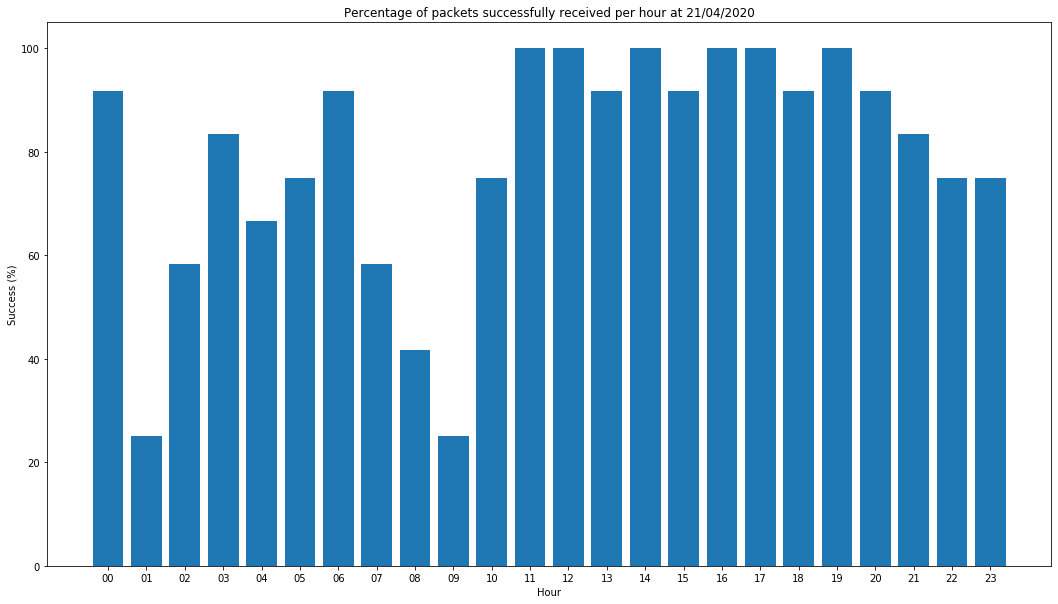

In [7]:
plt.figure(figsize=(18, 10))
plt.bar(pdr.index, pdr.values / 12 * 100)

plt.title('Percentage of packets successfully received per hour at 21/04/2020')
plt.ylabel('Success (%)')
plt.xlabel('Hour')
plt.show()

#### RSSI médio em cada hora

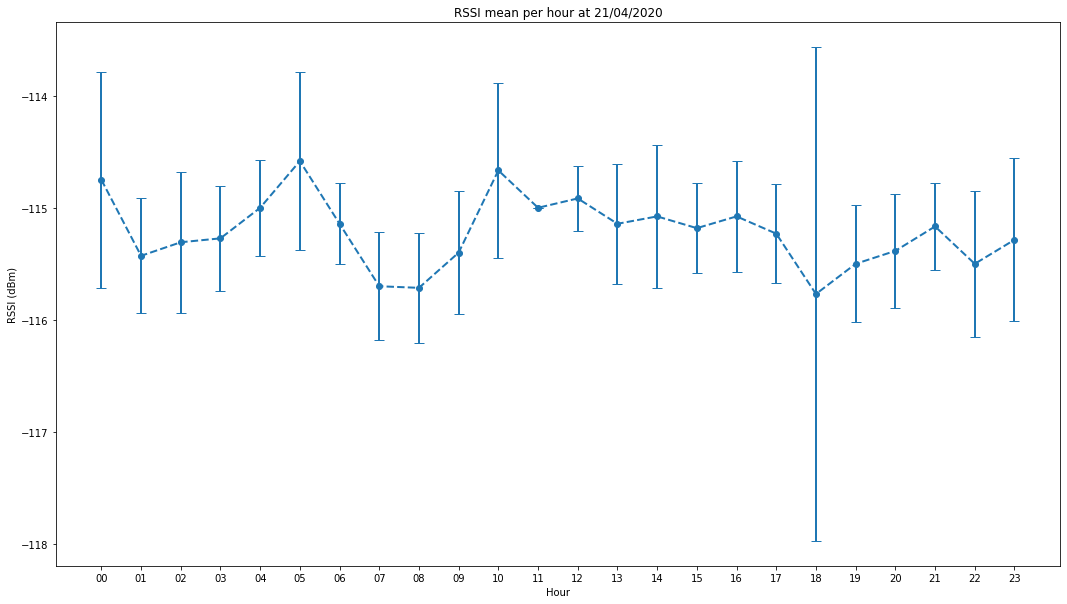

In [8]:
r = pd.Series(day['rssi'].values, index=day['time'].dt.strftime('%H'))

rssi = r.groupby(r.index).mean()
rssi_error = r.groupby(r.index).std()

plt.figure(figsize=(18, 10))
plt.errorbar(rssi.index, rssi.values, yerr=rssi_error, fmt='--o', linewidth=2.0, capsize=5)

plt.title('RSSI mean per hour at 21/04/2020')
plt.ylabel('RSSI (dBm)')
plt.xlabel('Hour')
plt.show()

## Todo

- [x] Sobrepor esse gráfico no de taxa de entrega, com eixo Y duplo. Pdr no lado esquerdo e rssi no lado direito
 - [X] sugestão de Ruan
 - [x] sugestão de Paulo

- [x] Calcular o desvio padrão do RSSI também

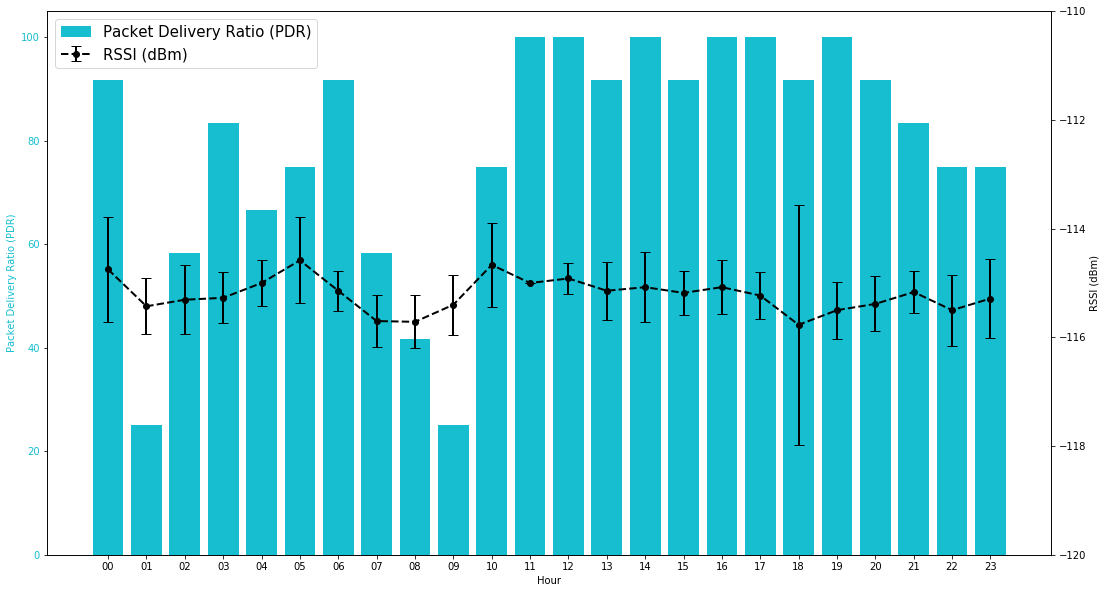

In [9]:
fig, pdr_ax = plt.subplots(figsize=(18, 10))

color = 'tab:cyan'

pdr_lns = pdr_ax.bar(pdr.index, pdr.values / 12 * 100, color=color, label='Packet Delivery Ratio (PDR)')

pdr_ax.set_xlabel('Hour')
pdr_ax.tick_params(axis='y', labelcolor=color)
pdr_ax.set_ylabel('Packet Delivery Ratio (PDR)', color=color)

rssi_ax = pdr_ax.twinx()

color = 'black'

rssi_lns = rssi_ax.errorbar(rssi.index, rssi.values, yerr=rssi_error, color=color, fmt='--o', linewidth=2.0, capsize=5, label='RSSI (dBm)')

rssi_ax.set_ylim((-120, -110))
rssi_ax.set_ylabel('RSSI (dBm)', color=color)
rssi_ax.tick_params(axis='y', labelcolor=color)

lns = [pdr_lns] + [rssi_lns]
labels = [l.get_label() for l in lns]

plt.legend(lns, labels, loc=2, prop={'size': 15})
plt.show()

fig.savefig('21-04-2020-graph-01.png')

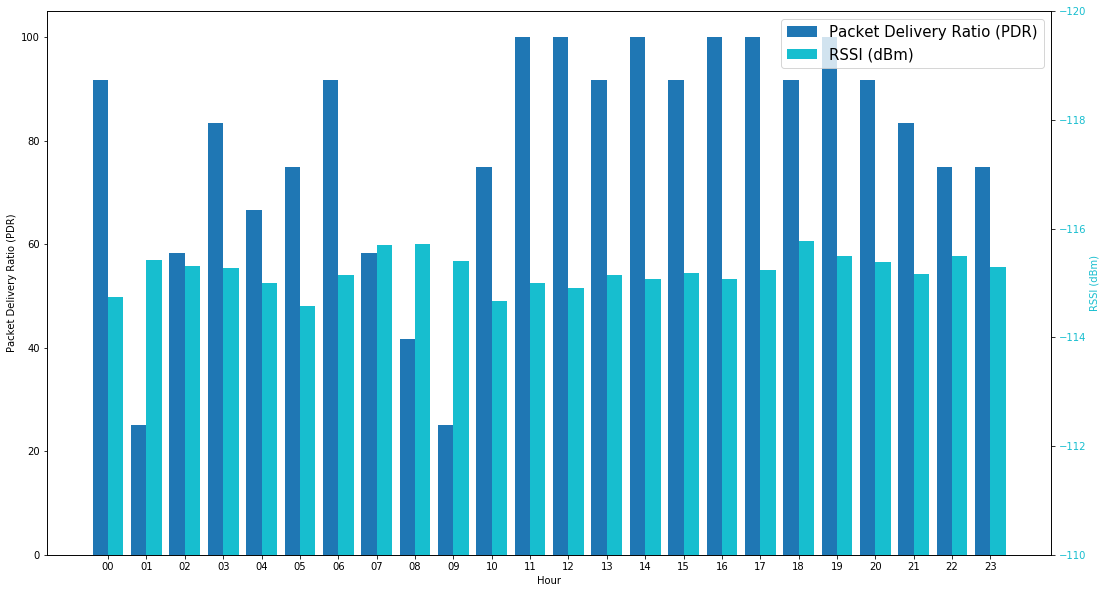

In [11]:
fig, pdr_ax = plt.subplots(figsize=(18, 10))

color = 'tab:cyan'
x = np.arange(24)
w = 0.4

pdr_lns = pdr_ax.bar(x, pdr.values / 12 * 100, width=w, label='Packet Delivery Ratio (PDR)')

pdr_ax.set_xlabel('Hour')
pdr_ax.set_ylabel('Packet Delivery Ratio (PDR)')
pdr_ax.tick_params(axis='y')

rssi_ax = pdr_ax.twinx()

color = 'tab:cyan'

rssi_lns = rssi_ax.bar(x + w, rssi.values, color=color, width=w, label='RSSI (dBm)')

rssi_ax.set_ylabel('RSSI (dBm)', color=color)
rssi_ax.tick_params(axis='y', labelcolor=color)
rssi_ax.set_ylim((-110, -120))

lns = [pdr_lns] + [rssi_lns]
labels = [l.get_label() for l in lns]

plt.xticks(x + w / 2, rssi.index, rotation='vertical')
plt.legend(lns, labels, loc=0, prop={ 'size': 15} )
plt.show()

fig.savefig('21-04-2020-graph-02.png')